In [1]:
from utils import add_project_root
add_project_root()

import b2sim.engine as b2
import b2sim.analysis as dd

The current cash and eco are (26000.0,1200)


,Time,Type,Message
0,284.8,Eco,Change eco to Zero
1,285.0,Round,Round 14 start
2,297.0,Round,Round 15 start
3,313.4,Round,Round 16 start
4,318.0,Buy,"Upgrade farm 0 to (0,4,1)"
5,346.4,Round,Round 17 start
6,385.7,Round,Round 18 start
7,411.8,Round,Round 19 start
8,448.2,Round,Round 20 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,0,14700,-14700,0.0,285.0,448.0


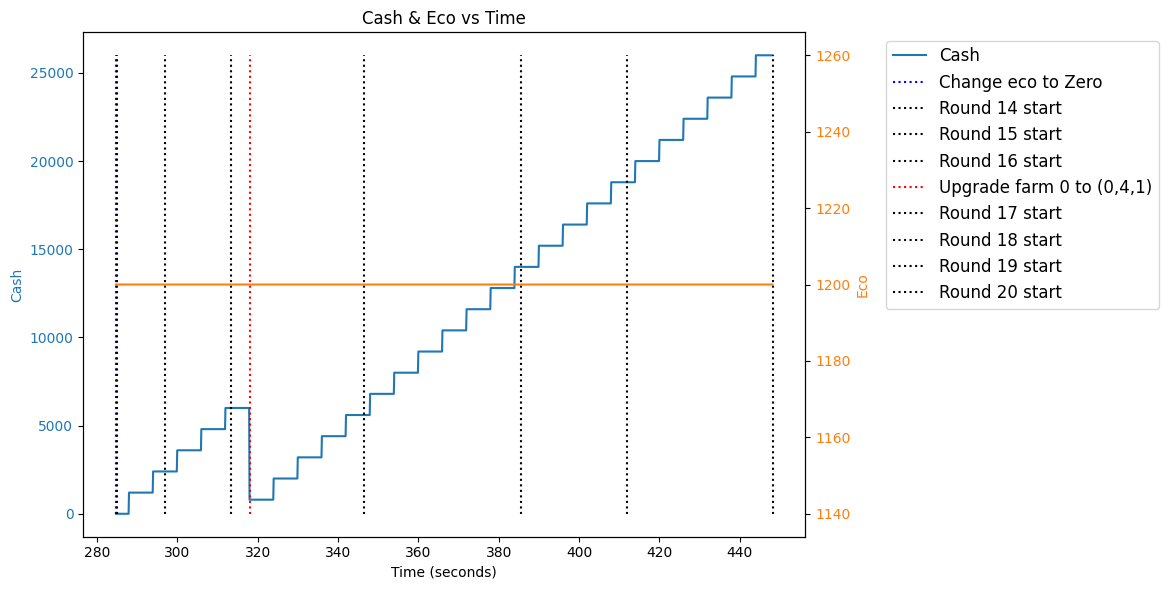

In [5]:
rounds = b2.Rounds(0.1)

farms = [
    b2.initFarm(rounds.getTimeFromRound(13.9), upgrades = [0,3,1])
]

buy_queue = [
    [b2.upgradeFarm(0,upgrades=(0,4,1))]
]

initial_state_game = {
    'Cash': 0,
    'Eco': 1200,
    'Eco Send': b2.ecoSend(send_name = 'Zero'),
    'Rounds': rounds, #Determines the lengths of the rounds in the game state
    'Farms': farms,
    'Buy Queue': buy_queue,
    'Game Round': 13.99
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 20)

print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'quality_soil_test_log')
dd.viewHistory(game_state)